<a href="https://colab.research.google.com/github/swapnilxi/computer-vision/blob/main/Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# flat chess

In [ ]:
# prompt: displaying the image after reading from drive , flat_chess

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')

# # flat chess
image_path = '/content/drive/MyDrive/flat_chess.jpg' # Replace with your image path
try:
  img = cv2.imread(image_path)
  if img is None:
    print(f"Error: Could not read image at {image_path}")
  else:
    # Convert BGR to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
except Exception as e:
  print(f"An error occurred: {e}")


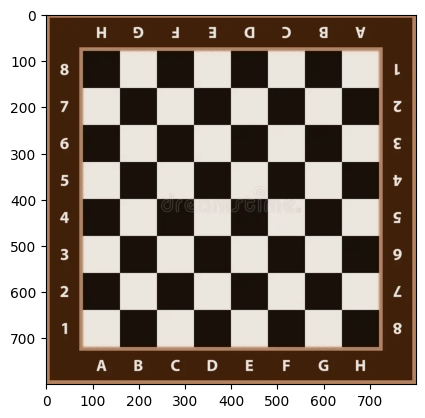

In [10]:
flat_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/chessboard_black.webp')
flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)


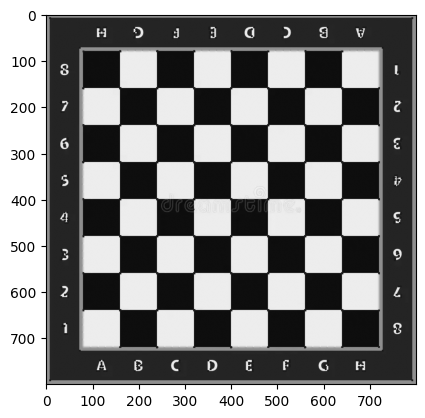

In [19]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

#Real chess

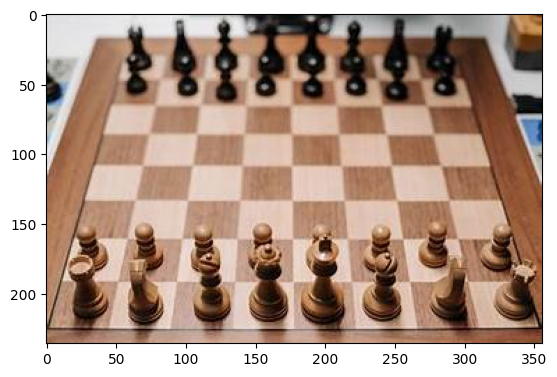

In [4]:
real_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/real_chess.jpeg')
real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

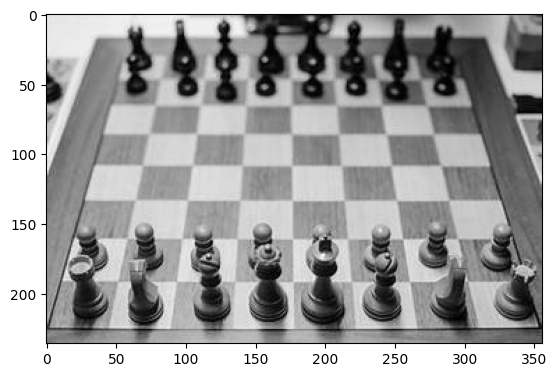

In [7]:
gray_real_chess= cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap="gray")

In [14]:
print(gray_flat_chess)

[[141 141 141 ... 142 142 142]
 [141 141 141 ... 142 142 142]
 [141 141 141 ... 142 142 142]
 ...
 [142 142 142 ... 142 142 142]
 [142 142 142 ... 142 142 142]
 [142 142 142 ... 142 142 142]]


#corner detection


### Harris Corner Detection
Harris Corner Detection Requires Gradients
The Harris algorithm computes image gradients (derivatives in x and y directions) using operations like Sobel filters. These gradients are floating-point values (e.g., -0.5, 1.234), not integers.

Using float32 ensures these intermediate calculations retain precision and avoid truncation errors.

> For this reason we need to convert the values in float32

convert the values in float32 values  

#### Without float32:
- If gray_flat_chess is uint8 (e.g., values 0-255), operations like
  gradient calculations (Ix, Iy) would lose precision or overflow, leading to incorrect corners.



In [31]:
gray = np.float32(gray_flat_chess)
print(gray)

[[141. 141. 141. ... 142. 142. 142.]
 [141. 141. 141. ... 142. 142. 142.]
 [141. 141. 141. ... 142. 142. 142.]
 ...
 [142. 142. 142. ... 142. 142. 142.]
 [142. 142. 142. ... 142. 142. 142.]
 [142. 142. 142. ... 142. 142. 142.]]


### cv2.cornerHarris(src, blockSize, ksize, k)

#### dst
dst stands for "destination": It is the output matrix of the Harris corner detection process.
#### Ksize and k  
ksize: Controls the size of the Sobel kernel used to compute gradients.

Use ksize=3 for most cases.
- Uses a 3x3 Sobel kernel.
- A larger ksize means a larger kernel, which results in smoother gradient calculations (less sensitive to noise but may miss fine details).

k: Controls the sensitivity of the corner detector.

Use k=0.04 as a starting point, and adjust based on your needs.

In [32]:
dst = cv2.cornerHarris( src= gray,blockSize= 2,ksize=3, k=0.04)

#### Dilation
Dilation is used to expand bright regions in an image.

In corner detection, it helps enhance the corner response map (dst) by making corners more visible.

The cv2.dilate function takes two arguments:

dst: The input image (corner response map in this case).

None: The kernel (if None, a default 3x3 rectangular kernel is used).

In [33]:
dst = cv2.dilate(dst,None)

### Detecting corner with threshold
dst > 0.01 * dst.max():

dst is the output of cv2.cornerHarris, which is a floating-point matrix where each pixel value represents the "corner strength" at that location.

0.01 * dst.max() is a threshold value. Pixels in dst with values greater than this threshold are considered corners.

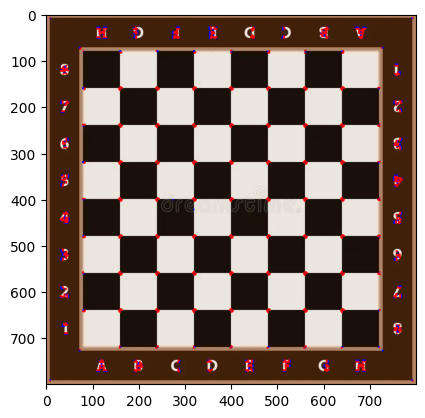

In [34]:
flat_chess[dst>0.05*dst.max()]=[255,0,0]
plt.imshow(flat_chess)

### corner detection on Real chess

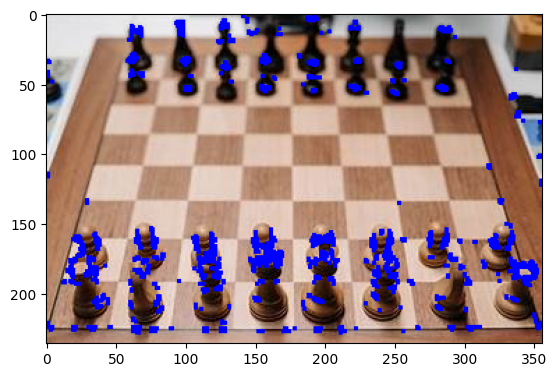

In [27]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.02 * dst.max()] = [0, 0, 255]  # Adjust the threshold as needed
plt.imshow(real_chess)


## Shi-tomashi corner Detection